In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import mannwhitneyu as u_test

In [76]:
price_insight = pd.read_csv('pricing_insights_mvp.csv')

In [77]:
price_insight.head(5)

,ga_master_consumer_feature_variant_name,ga_master_table_hits_page_path,ga_master_table_count_visitors,ga_master_table_hits_total_ldp_1,ga_master_table_hits_total_lead,sum_of_time_to_next_hit,ga_master_table_count_sessions,average_of_time_to_next_hit,count_of_page_path
0,cplus-5148_pricing-insight_v1,/cho-thue-nha-tro-phong-tro-duong-so-38-phuong...,19,124,1,976.019,26,13.370123,1
1,cplus-5148_pricing-insight_origin,/ban-dat-duong-32-xa-kim-chung-1/chu-nha-gui-b...,42,52,7,4271.179,47,32.855223,1
2,cplus-5148_pricing-insight_origin,/ban-nha-biet-thu-lien-ke-duong-to-huu-phuong-...,75,86,12,8234.443,79,37.429286,1
3,cplus-5148_pricing-insight_origin,/ban-dat-nen-du-an-duong-vanh-dai-trong-xa-pho...,21,276,1,1427.432,21,29.131265,1
4,cplus-5148_pricing-insight_origin,/ban-dat-phuong-linh-tay/khu-du-areco-dep-nhat...,18,69,4,3129.370,21,54.901228,1


In [78]:
price_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944830 entries, 0 to 944829
Data columns (total 9 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ga_master_consumer_feature_variant_name  944830 non-null  object 
 1   ga_master_table_hits_page_path           944830 non-null  object 
 2   ga_master_table_count_visitors           944830 non-null  int64  
 3   ga_master_table_hits_total_ldp_1         944830 non-null  int64  
 4   ga_master_table_hits_total_lead          944830 non-null  int64  
 5   sum_of_time_to_next_hit                  944830 non-null  float64
 6   ga_master_table_count_sessions           944830 non-null  int64  
 7   average_of_time_to_next_hit              944830 non-null  float64
 8   count_of_page_path                       944830 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 64.9+ MB


In [79]:
price_insight.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ga_master_table_count_visitors,944830.0,5.310935,14.013313,1.0,1.00000,2.000000,5.000000,1432.000
ga_master_table_hits_total_ldp_1,944830.0,53.567648,646.901435,0.0,2.00000,6.000000,20.000000,180730.000
ga_master_table_hits_total_lead,944830.0,0.681095,2.646479,0.0,0.00000,0.000000,1.000000,379.000
sum_of_time_to_next_hit,944830.0,555.366387,1615.505177,0.0,25.82500,112.469500,499.511250,185591.570
ga_master_table_count_sessions,944830.0,5.929147,15.946692,0.0,1.00000,2.000000,5.000000,1587.000
average_of_time_to_next_hit,944830.0,29.567296,52.964284,0.0,5.72075,14.983992,31.923196,1608.302
count_of_page_path,944830.0,1.000000,0.000000,1.0,1.00000,1.000000,1.000000,1.000


In [80]:
price_insight['LDP_Pageview_per_user'] = price_insight.ga_master_table_hits_total_ldp_1/price_insight.ga_master_table_count_visitors
price_insight['Lead_per_user'] = price_insight.ga_master_table_hits_total_lead/price_insight.ga_master_table_count_visitors
price_insight['ToS_per_session'] = price_insight.sum_of_time_to_next_hit/price_insight.ga_master_table_count_sessions

In [81]:
price_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944830 entries, 0 to 944829
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ga_master_consumer_feature_variant_name  944830 non-null  object 
 1   ga_master_table_hits_page_path           944830 non-null  object 
 2   ga_master_table_count_visitors           944830 non-null  int64  
 3   ga_master_table_hits_total_ldp_1         944830 non-null  int64  
 4   ga_master_table_hits_total_lead          944830 non-null  int64  
 5   sum_of_time_to_next_hit                  944830 non-null  float64
 6   ga_master_table_count_sessions           944830 non-null  int64  
 7   average_of_time_to_next_hit              944830 non-null  float64
 8   count_of_page_path                       944830 non-null  int64  
 9   LDP_Pageview_per_user                    944830 non-null  float64
 10  Lead_per_user                   

In [82]:
price_insight.isnull().sum()

ga_master_consumer_feature_variant_name     0
ga_master_table_hits_page_path              0
ga_master_table_count_visitors              0
ga_master_table_hits_total_ldp_1            0
ga_master_table_hits_total_lead             0
sum_of_time_to_next_hit                     0
ga_master_table_count_sessions              0
average_of_time_to_next_hit                 0
count_of_page_path                          0
LDP_Pageview_per_user                       0
Lead_per_user                               0
ToS_per_session                            24
dtype: int64

In [91]:
price_insight[['ToS_per_session']]

,ToS_per_session
0,37.539192
1,90.876149
2,104.233456
3,67.972952
4,149.017619
...,...
944825,66.897000
944826,317.076000
944827,305.748000
944828,10.143000


In [85]:
price_insight_2 = price_insight.copy()
price_insight_2['ToS_per_session'] = price_insight_2.ToS_per_session.replace(np.inf,np.nan).fillna(0)
price_insight_2.head(5)

,ga_master_consumer_feature_variant_name,ga_master_table_hits_page_path,ga_master_table_count_visitors,ga_master_table_hits_total_ldp_1,ga_master_table_hits_total_lead,sum_of_time_to_next_hit,ga_master_table_count_sessions,average_of_time_to_next_hit,count_of_page_path,LDP_Pageview_per_user,Lead_per_user,ToS_per_session
0,cplus-5148_pricing-insight_v1,/cho-thue-nha-tro-phong-tro-duong-so-38-phuong...,19,124,1,976.019,26,13.370123,1,6.526316,0.052632,37.539192
1,cplus-5148_pricing-insight_origin,/ban-dat-duong-32-xa-kim-chung-1/chu-nha-gui-b...,42,52,7,4271.179,47,32.855223,1,1.238095,0.166667,90.876149
2,cplus-5148_pricing-insight_origin,/ban-nha-biet-thu-lien-ke-duong-to-huu-phuong-...,75,86,12,8234.443,79,37.429286,1,1.146667,0.160000,104.233456
3,cplus-5148_pricing-insight_origin,/ban-dat-nen-du-an-duong-vanh-dai-trong-xa-pho...,21,276,1,1427.432,21,29.131265,1,13.142857,0.047619,67.972952
4,cplus-5148_pricing-insight_origin,/ban-dat-phuong-linh-tay/khu-du-areco-dep-nhat...,18,69,4,3129.370,21,54.901228,1,3.833333,0.222222,149.017619


In [86]:
price_insight_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944830 entries, 0 to 944829
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ga_master_consumer_feature_variant_name  944830 non-null  object 
 1   ga_master_table_hits_page_path           944830 non-null  object 
 2   ga_master_table_count_visitors           944830 non-null  int64  
 3   ga_master_table_hits_total_ldp_1         944830 non-null  int64  
 4   ga_master_table_hits_total_lead          944830 non-null  int64  
 5   sum_of_time_to_next_hit                  944830 non-null  float64
 6   ga_master_table_count_sessions           944830 non-null  int64  
 7   average_of_time_to_next_hit              944830 non-null  float64
 8   count_of_page_path                       944830 non-null  int64  
 9   LDP_Pageview_per_user                    944830 non-null  float64
 10  Lead_per_user                   

In [87]:
price_insight_2.groupby('ga_master_consumer_feature_variant_name').agg(
    avg_LDP_Pagevie_per_user = ('LDP_Pageview_per_user', 'mean'),
    median_LDP_Pageview_per_user = ('LDP_Pageview_per_user', 'median'),
    avg_Lead_per_user = ('Lead_per_user', 'mean'),
    median_Lead_per_user = ('Lead_per_user', 'median'),
    avg_ToS_per_session = ('ToS_per_session', 'mean'),
    median_ToS_per_session = ('ToS_per_session', 'median')
)

,avg_LDP_Pagevie_per_user,median_LDP_Pageview_per_user,avg_Lead_per_user,median_Lead_per_user,avg_ToS_per_session,median_ToS_per_session
ga_master_consumer_feature_variant_name,,,,,,
cplus-5148_pricing-insight_origin,6.414376,2.0,0.111806,0.0,95.877556,46.6050
cplus-5148_pricing-insight_v1,8.288080,3.0,0.133518,0.0,92.135478,35.4415


In [130]:
LDP_Pageview_per_user_origin = price_insight_2[price_insight_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_origin']['LDP_Pageview_per_user']
LDP_Pageview_per_user_v1 = price_insight_2[price_insight_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1']['LDP_Pageview_per_user']
Lead_per_user_origin = price_insight_2[price_insight_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_origin']['Lead_per_user']
Lead_per_user_v1 = price_insight_2[price_insight_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1']['Lead_per_user']
ToS_per_session_origin = price_insight_2[price_insight_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_origin']['ToS_per_session']
ToS_per_session_v1 = price_insight_2[price_insight_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1']['ToS_per_session']

In [134]:
#2 sample with unequal variance (mean & assumed normal dist.)
#Since the sample size is large enough, then central limit theorem could be applied, which means the sampling dist. of the mean is normally distributed
#LDP Pageview per user
t1, p1 = stats.ttest_ind(LDP_Pageview_per_user_origin, LDP_Pageview_per_user_v1, equal_var=False, alternative = 'less')
print('The result of 2-sample t-test of LDP Pageview per user (origin < v1):' + 't-stat = '+ str(t1) + ' & ' + 'p-value = ' + str(p1))

#Lead per user
t2, p2 = stats.ttest_ind(Lead_per_user_origin, Lead_per_user_v1, equal_var=False, alternative = 'less')
print('The result of 2-sample t-test of Lead per user (origin < v1):' + 't-stat = '+ str(t2) + ' & ' + 'p-value = ' + str(p2))

#ToS per session
t3, p3 = stats.ttest_ind(ToS_per_session_origin, ToS_per_session_v1, equal_var=False, alternative = 'greater')
print('The result of 2-sample t-test of Time on site per session (origin > v1):' + 't-stat = '+ str(t3) + ' & ' + 'p-value = ' + str(p3))

The result of 2-sample t-test of LDP Pageview per user (origin < v1):t-stat = -33.95090761024275 & p-value = 3.132227500277412e-252
The result of 2-sample t-test of Lead per user (origin < v1):t-stat = -25.225650643338128 & p-value = 1.7417638333997933e-140
The result of 2-sample t-test of Time on site per session (origin > v1):t-stat = 7.253644050057767 & p-value = 2.035247953911086e-13


In [132]:
#Mannwhitneyu Test (median & free-dist.)
#LDP Pageview per user
a1, b1 = u_test(LDP_Pageview_per_user_origin, LDP_Pageview_per_user_v1, alternative = 'less')
print('The result of Mannwhitneyu Test of LDP Pageview per user (origin < v1):' + 'u-stat = '+ str(a1) + ' & ' + 'p-value = ' + str(b1))

#Lead per user
a2, b2 = u_test(Lead_per_user_origin, Lead_per_user_v1, alternative = 'greater')
print('The result of Mannwhitneyu Test of Lead per user (origin > v1):' + 'u-stat = '+ str(a2) + ' & ' + 'p-value = ' + str(b2))

#ToS per session
a3, b3 = u_test(ToS_per_session_origin, ToS_per_session_v1, alternative = 'greater')
print('The result of Mannwhitneyu Test of Time on site per session (origin > v1):' + 'u-stat = '+ str(a3) + ' & ' + 'p-value = ' + str(b3))

The result of Mannwhitneyu Test of LDP Pageview per user (origin < v1):u-stat = 59763130096.0 & p-value = 3.6468634628175456e-301
The result of Mannwhitneyu Test of Lead per user (origin > v1):u-stat = 70430714785.5 & p-value = 0.0
The result of Mannwhitneyu Test of Time on site per session (origin > v1):u-stat = 69813224191.0 & p-value = 0.0


In [98]:
#Since the stats test result of Lead per user conflicts in 2 types of test, there is a high possibility of that the distribution of it is skewed and not normally distributed
lead_per_user_adj = price_insight_2[price_insight_2.Lead_per_user.between(price_insight_2.Lead_per_user.quantile(0.05), price_insight_2.Lead_per_user.quantile(0.95))]['Lead_per_user']
lead_per_user_adj

0         0.052632
1         0.166667
2         0.160000
3         0.047619
4         0.222222
            ...   
944825    0.000000
944826    0.000000
944827    0.000000
944828    0.000000
944829    1.000000
Name: Lead_per_user, Length: 943000, dtype: float64

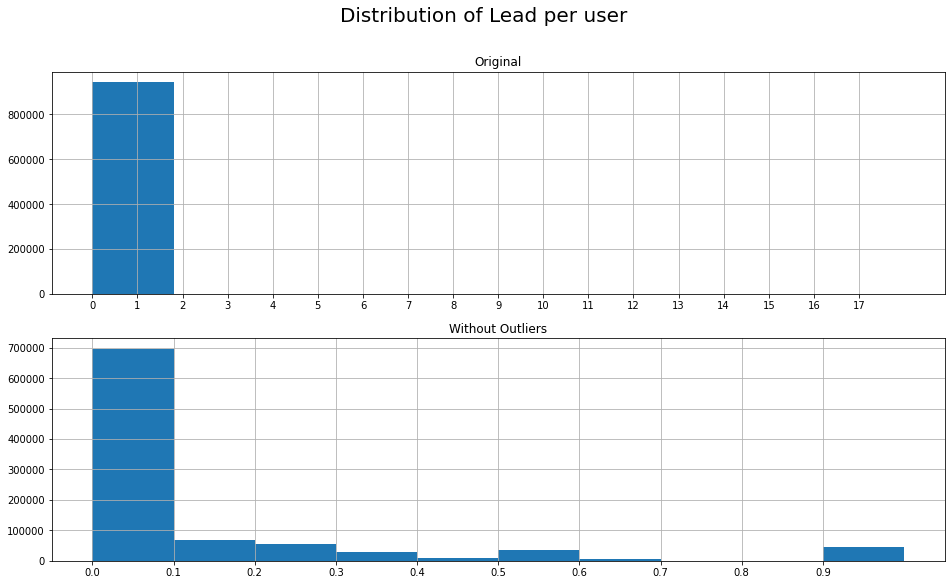

<Figure size 432x288 with 0 Axes>

In [122]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,9))
#plt.figsize(15,15)

ax1.hist(price_insight_2['Lead_per_user'])
ax1.set_title('Original')

ax2.hist(lead_per_user_adj)
ax2.set_title('Without Outliers')

ax1.grid()
ax2.grid()

ax1.set_xticks(np.arange(price_insight_2['Lead_per_user'].min(), price_insight_2['Lead_per_user'].max(), 1))
ax2.set_xticks(np.arange(lead_per_user_adj.min(), lead_per_user_adj.max(), 0.1))

fig.suptitle('Distribution of Lead per user', fontsize = 20)
plt.show()
plt.tight_layout()
#plt.set_title('Distribution of Lead per user')

In [125]:
price_range = pd.read_csv('pricing_range_mvp.csv')
price_range.head(5)

,ga_master_consumer_feature_variant_name,ga_master_table_hits_page_path,pricing_type,ga_master_table_count_visitors,ga_master_table_hits_total_ldp_1,ga_master_table_hits_total_lead,sum_of_time_to_next_hit,ga_master_table_count_sessions,average_of_time_to_next_hit,count_of_page_path
0,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-4s-riverside-linh-dong/co...,NaN,1,3,1,1549.611,2,110.686500,1
1,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-6th-element/-cap-nhat-ban...,NaN,1,1,0,191.114,1,47.778500,1
2,cplus-5148_pricing-insight_v1,/ban-can-ho-chung-cu-6th-element/-goc-ngoai-gi...,lower,1,32,1,65.040,1,21.680000,1
3,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-6th-element/-goc-ngoai-gi...,lower,69,3104,23,9557.752,80,34.134829,1
4,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-ab-central-square/unit-te...,NaN,1,3,1,1356.427,1,96.887643,1


In [137]:
price_range['LDP_Pageview_per_user'] = price_range.ga_master_table_hits_total_ldp_1/price_range.ga_master_table_count_visitors
price_range['Lead_per_user'] = price_range.ga_master_table_hits_total_lead/price_range.ga_master_table_count_visitors
price_range['ToS_per_session'] = price_range.sum_of_time_to_next_hit/price_range.ga_master_table_count_sessions

In [128]:
price_range_2 = price_range.copy()
#price_range_2['LDP_Pageview_per_user'] = price_range_2.LDP_Pageview_per_user.replace(np.inf,np.nan).fillna(0)
#price_range_2['Lead_per_user'] = price_range_2.Lead_per_user.replace(np.inf,np.nan).fillna(0)
price_range_2['ToS_per_session'] = price_range_2.ToS_per_session.replace(np.inf,np.nan).fillna(0)
price_range_2.head(5)

,ga_master_consumer_feature_variant_name,ga_master_table_hits_page_path,pricing_type,ga_master_table_count_visitors,ga_master_table_hits_total_ldp_1,ga_master_table_hits_total_lead,sum_of_time_to_next_hit,ga_master_table_count_sessions,average_of_time_to_next_hit,count_of_page_path,LDP_Pageview_per_user,Lead_per_user,ToS_per_session
0,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-4s-riverside-linh-dong/co...,NaN,1,3,1,1549.611,2,110.686500,1,3.000000,1.000000,774.8055
1,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-6th-element/-cap-nhat-ban...,NaN,1,1,0,191.114,1,47.778500,1,1.000000,0.000000,191.1140
2,cplus-5148_pricing-insight_v1,/ban-can-ho-chung-cu-6th-element/-goc-ngoai-gi...,lower,1,32,1,65.040,1,21.680000,1,32.000000,1.000000,65.0400
3,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-6th-element/-goc-ngoai-gi...,lower,69,3104,23,9557.752,80,34.134829,1,44.985507,0.333333,119.4719
4,cplus-5148_pricing-insight_origin,/ban-can-ho-chung-cu-ab-central-square/unit-te...,NaN,1,3,1,1356.427,1,96.887643,1,3.000000,1.000000,1356.4270


In [142]:
price_range_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048809 entries, 0 to 1048808
Data columns (total 13 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   ga_master_consumer_feature_variant_name  1048809 non-null  object 
 1   ga_master_table_hits_page_path           1048809 non-null  object 
 2   pricing_type                             883684 non-null   object 
 3   ga_master_table_count_visitors           1048809 non-null  int64  
 4   ga_master_table_hits_total_ldp_1         1048809 non-null  int64  
 5   ga_master_table_hits_total_lead          1048809 non-null  int64  
 6   sum_of_time_to_next_hit                  1048809 non-null  float64
 7   ga_master_table_count_sessions           1048809 non-null  int64  
 8   average_of_time_to_next_hit              1048809 non-null  float64
 9   count_of_page_path                       1048809 non-null  int64  
 10  LDP_Pageview_per_u

In [138]:
price_range_2.groupby(['ga_master_consumer_feature_variant_name', 'pricing_type']).agg(
    avg_LDP_Pagevie_per_user = ('LDP_Pageview_per_user', 'mean'),
    median_LDP_Pageview_per_user = ('LDP_Pageview_per_user', 'median'),
    avg_Lead_per_user = ('Lead_per_user', 'mean'),
    median_Lead_per_user = ('Lead_per_user', 'median'),
    avg_ToS_per_session = ('ToS_per_session', 'mean'),
    median_ToS_per_session = ('ToS_per_session', 'median')
)

avg_LDP_Pagevie_per_user  \
ga_master_consumer_feature_variant_name pricing_type                             
cplus-5148_pricing-insight_origin       higher                        4.068515   
                                        lower                        11.012400   
                                        within                        5.731547   
cplus-5148_pricing-insight_v1           higher                        4.279845   
                                        lower                        13.748994   
                                        within                        7.344922   

                                                      median_LDP_Pageview_per_user  \
ga_master_consumer_feature_variant_name pricing_type                                 
cplus-5148_pricing-insight_origin       higher                            2.000000   
                                        lower                             3.750000   
                                        within                            2.000000   
cplus-5148_pricing-insight_v1           higher                            2.000000   
                                        lower                             5.000000   
                                        within                            2.666667   

                                                      avg_Lead_per_user  \
ga_master_consumer_feature_variant_name pricing_type                      
cplus-5148_pricing-insight_origin       higher                 0.101710   
                                        lower                  0.095778   
                                        within                 0.113340   
cplus-5148_pricing-insight_v1           higher                 0.132444   
                                        lower                  0.124198   
                                        within                 0.132785   

                                                      median_Lead_per_user  \
ga_master_consumer_feature_variant_name pricing_type                         
cplus-5148_pricing-insight_origin       higher                         0.0   
                                        lower                          0.0   
                                        within                         0.0   
cplus-5148_pricing-insight_v1           higher                         0.0   
                                        lower                          0.0   
                                        within                         0.0   

                                                      avg_ToS_per_session  \
ga_master_consumer_feature_variant_name pricing_type                        
cplus-5148_pricing-insight_origin       higher                  94.196553   
                                        lower                   96.020344   
                                        within                  95.992888   
cplus-5148_pricing-insight_v1           higher                  86.269857   
                                        lower                   90.583925   
                                        within                  92.486018   

                                                      median_ToS_per_session  
ga_master_consumer_feature_variant_name pricing_type                          
cplus-5148_pricing-insight_origin       higher                     49.712000  
                                        lower                      48.886008  
                                        within                     48.319000  
cplus-5148_pricing-insight_v1           higher                     32.301000  
                                        lower                      36.092750  
                                        within                     36.248000

In [149]:
LDP_Pageview_per_user_v1_lower = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'lower')]['LDP_Pageview_per_user']
LDP_Pageview_per_user_v1_higher = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'higher')]['LDP_Pageview_per_user']
LDP_Pageview_per_user_v1_within = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'within')]['LDP_Pageview_per_user']

Lead_per_user_v1_lower = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'lower')]['Lead_per_user']
Lead_per_user_v1_higher = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'higher')]['Lead_per_user']
Lead_per_user_v1_within = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'within')]['Lead_per_user']

ToS_per_session_v1_lower = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'lower')]['ToS_per_session']
ToS_per_session_v1_higher = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'higher')]['ToS_per_session']
ToS_per_session_v1_within = price_range_2[(price_range_2['ga_master_consumer_feature_variant_name'] == 'cplus-5148_pricing-insight_v1') & (price_range_2['pricing_type'] == 'within')]['ToS_per_session']

In [168]:
#Mannwhitneyu Test (median & free-dist.)
#LDP Pageview per user
x1, y1 = u_test(LDP_Pageview_per_user_v1_lower, LDP_Pageview_per_user_v1_within, alternative = 'greater')
print('The result of Mannwhitneyu Test of LDP Pageview per user (lower > within):' + 'u-stat = '+ str(x1) + ' & ' + 'p-value = ' + str(y1))

x2, y2 = u_test(LDP_Pageview_per_user_v1_within, LDP_Pageview_per_user_v1_higher, alternative = 'greater')
print('The result of Mannwhitneyu Test of LDP Pageview per user (within > higher):' + 'u-stat = '+ str(x2) + ' & ' + 'p-value = ' + str(y2))

x3, y3 = u_test(LDP_Pageview_per_user_v1_lower, LDP_Pageview_per_user_v1_higher, alternative = 'greater')
print('The result of Mannwhitneyu Test of LDP Pageview per user (lower > higher):' + 'u-stat = '+ str(x3) + ' & ' + 'p-value = ' + str(y3))

The result of Mannwhitneyu Test of LDP Pageview per user (lower > within):u-stat = 1096761887.0 & p-value = 0.0
The result of Mannwhitneyu Test of LDP Pageview per user (within > higher):u-stat = 572045194.5 & p-value = 3.8052954427407316e-51
The result of Mannwhitneyu Test of LDP Pageview per user (lower > higher):u-stat = 63006060.5 & p-value = 0.0


In [173]:
#Lead per user
x1, y1 = u_test(Lead_per_user_v1_lower, Lead_per_user_v1_within)
print('The result of Mannwhitneyu Test of Lead per user (lower vs within):' + 'u-stat = '+ str(x1) + ' & ' + 'p-value = ' + str(y1))

x2, y2 = u_test(Lead_per_user_v1_within, Lead_per_user_v1_higher, alternative = 'greater')
print('The result of Mannwhitneyu Test of Lead per user (within > higher):' + 'u-stat = '+ str(x2) + ' & ' + 'p-value = ' + str(y2))

x3, y3 = u_test(Lead_per_user_v1_lower, Lead_per_user_v1_higher)
print('The result of Mannwhitneyu Test of Lead per user (lower vs higher):' + 'u-stat = '+ str(x3) + ' & ' + 'p-value = ' + str(y3))

The result of Mannwhitneyu Test of Lead per user (lower vs within):u-stat = 896592149.5 & p-value = 0.4494601861308299
The result of Mannwhitneyu Test of Lead per user (within > higher):u-stat = 524142617.5 & p-value = 0.02266825319862806
The result of Mannwhitneyu Test of Lead per user (lower vs higher):u-stat = 46992210.5 & p-value = 0.05547956837926216


In [170]:
#Time on site per session
x1, y1 = u_test(ToS_per_session_v1_lower, ToS_per_session_v1_within, alternative = 'less')
print('The result of Mannwhitneyu Test of Time on site per session (lower < within):' + 'u-stat = '+ str(x1) + ' & ' + 'p-value = ' + str(y1))

x2, y2 = u_test(ToS_per_session_v1_within, ToS_per_session_v1_higher, alternative = 'greater')
print('The result of Mannwhitneyu Test of Time on site per session (within > higher):' + 'u-stat = '+ str(x2) + ' & ' + 'p-value = ' + str(y2))

x3, y3 = u_test(ToS_per_session_v1_lower, ToS_per_session_v1_higher, alternative = 'greater')
print('The result of Mannwhitneyu Test of Time on site per session (lower > higher):' + 'u-stat = '+ str(x3) + ' & ' + 'p-value = ' + str(y3))

The result of Mannwhitneyu Test of Time on site per session (lower < within):u-stat = 883941985.5 & p-value = 0.003163787166388782
The result of Mannwhitneyu Test of Time on site per session (within > higher):u-stat = 545981476.5 & p-value = 4.7288304548783126e-14
The result of Mannwhitneyu Test of Time on site per session (lower > higher):u-stat = 49098018.5 & p-value = 1.2914882612869994e-05
